## Обработка данных по скоростям счета, полученным от источников Sr-90 и K-40 из БелГИМ.

### Импортируем библиотеки

In [10]:
import matplotlib.pyplot as plt
from turtle import color
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('dark_background')

### Задаем константы

In [11]:
# constant : Aver_stat: the hightest  measurement sigma, Act: the data of activity of the simples
Aver_stat = 5
Act = pd.DataFrame(index=['Sr_1_A=2.13', 'Sr_2_A=10.96', 'Sr_3_A=21.03', 'Sr_4_A=30.56', 'Sr_5_A=49.57', 'K_1_A=14.6', 'K_2_A=7.4', 'K_3_A=10.3', 'K_4_A=12'])
Act['Activity'] = [2.13, 10.96, 21.03, 30.56, 49.57, 14.6, 7.4, 10.3, 12]
Act['sample_num'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Act.to_csv('Activity_BelGIM_sorces.csv')
Act


,Activity,sample_num
Sr_1_A=2.13,2.13,1
Sr_2_A=10.96,10.96,2
Sr_3_A=21.03,21.03,3
Sr_4_A=30.56,30.56,4
Sr_5_A=49.57,49.57,5
K_1_A=14.6,14.60,6
K_2_A=7.4,7.40,7
K_3_A=10.3,10.30,8
K_4_A=12,12.00,9


## Формируем базу данных
______

### Вносим данные об измерениях, сделланные на начальном этапе, на базе АТОМТЕХ, На экспериментальном приборе

In [12]:
# enter the data

ind = ['nucl', 'mass', 'beckgr', 'm_data']
n = dict()
n[0] = ['Sr_1_A=2.13', 0.15, 0.823, [0.992, 0.948, 0.944, 0.929]]
n[1] = ['Sr_1_A=2.13', 0.30, 0.832, [0.987, 1.01, 1.01, 1.05, 1.11]]
n[2] = ['Sr_1_A=2.13', 0.45, 0.832, [1.07, 1.15, 1.12, 1.07, 1.04]]
n[3] = ['Sr_2_A=10.96', 0.05, 0.826, [1.23, 1.21, 1.17, 1.21, 1.26]]
n[4] = ['Sr_2_A=10.96', 0.15, 0.826, [1.61, 1.63, 1.56, 1.64, 1.56]] 
n[5] = ['Sr_2_A=10.96', 0.30, 0.826, [2.10, 2.06, 2.06, 2.14, 2.02]]
n[6] = ['Sr_3_A=21.03', 0.15, 0.826, [2.25, 2.38, 2.17, 2.35, 2.26]]
n[7] = ['Sr_3_A=21.03', 0.05, 0.826, [1.35, 1.37, 1.40, 1.35, 1.37]]
n[8] = ['Sr_3_A=21.03', 0.30, 0.818, [2.988, 3.101, 3.015]]
n[9] = ['Sr_1_A=2.13', 0.15, 0.841, [0.957, 1, 0.964, 0.961, 0.981, 0.936]]
n[10] = ['Sr_4_A=30.56', 0.05, 0.873, [1.64, 1.64, 1.57, 1.52, 1.45]]
n[11] = ['Sr_4_A=30.56', 0.15, 0.873, [2.76, 2.86, 2.74, 2.82, 2.73]]
n[12] = ['Sr_4_A=30.56', 0.3, 0.789, [4.22, 4.34, 4.29, 4.22, 4.26]]
n[13] = ['Sr_5_A=49.57', 0.05, 0.848, [2.33, 2.35, 2.44, 2.31, 2.37]]
n[14] = ['Sr_5_A=49.57', 0.15, 0.848, [4.26, 4.11, 4.22, 4.26, 4.27]]
n[15] = ['Sr_5_A=49.57', 0.3, 0.827, [6.49, 6.40, 6.28, 6.50, 6.37]]
n[16] = ['K_1_A=14.6', 0.15, 0.844, [1.54, 1.52, 1.52, 1.51, 1.48]]
n[17] = ['K_1_A=14.6', 0.05, 0.844, [1.09, 1.16, 1.20, 1.14, 1.10]]
n[18] = ['K_1_A=14.6', 0.3, 0.844, [2.06, 1.97, 1.97, 1.99, 1.97]]
n[19] = ['K_2_A=7.4', 0.05, 0.820, [0.998, 0.994, 0.942, 0.952, 0.934]]
n[20] = ['K_2_A=7.4', 0.15, 0.815, [1.16, 1.14, 1.15, 1.21, 1.20]]
n[21] = ['K_2_A=7.4', 0.3, 0.815, [1.31, 1.34, 1.34, 1.30, 1.31]]
n[22] = ['K_3_A=10.3', 0.3, 0.789, [1.59, 1.63, 1.61, 1.62, 1.56]]
n[23] = ['K_3_A=10.3', 0.05, 0.811, [1.01, 1.10, 1.08, 1.05, 1.07]]
n[24] = ['K_3_A=10.3', 0.1, 0.801, [1.28, 1.24, 1.17, 1.22, 1.21]]


data = pd.DataFrame(n, index = ind ).T
data.head()

,nucl,mass,beckgr,m_data
0,Sr_1_A=2.13,0.15,0.823,"[0.992, 0.948, 0.944, 0.929]"
1,Sr_1_A=2.13,0.3,0.832,"[0.987, 1.01, 1.01, 1.05, 1.11]"
2,Sr_1_A=2.13,0.45,0.832,"[1.07, 1.15, 1.12, 1.07, 1.04]"
3,Sr_2_A=10.96,0.05,0.826,"[1.23, 1.21, 1.17, 1.21, 1.26]"
4,Sr_2_A=10.96,0.15,0.826,"[1.61, 1.63, 1.56, 1.64, 1.56]"


### Вносим дополнительную информацию о приборе, проба, активности

In [13]:
# Add number of devise
data['Device'] = 'AT_OWN'

# function for calculatung and adding aditional information
def add_act(data):
    data['activity'] = 0
    data['sample_num'] = 1
    for i in range(len(data)):
       a = data['nucl'][i]
       print(a)
       data['activity'][i] = Act['Activity'][a] * data['mass'][i]
       data['sample_num'] = Act['sample_num'][a]
    return data

data = add_act(data)


Sr_1_A=2.13
Sr_1_A=2.13
Sr_1_A=2.13
Sr_2_A=10.96
Sr_2_A=10.96
Sr_2_A=10.96
Sr_3_A=21.03
Sr_3_A=21.03
Sr_3_A=21.03
Sr_1_A=2.13
Sr_4_A=30.56
Sr_4_A=30.56
Sr_4_A=30.56
Sr_5_A=49.57
Sr_5_A=49.57
Sr_5_A=49.57
K_1_A=14.6
K_1_A=14.6
K_1_A=14.6
K_2_A=7.4
K_2_A=7.4
K_2_A=7.4
K_3_A=10.3
K_3_A=10.3
K_3_A=10.3


C:\Users\fitu2\AppData\Local\Temp\ipykernel_6916\1970898421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['activity'][i] = Act['Activity'][a] * data['mass'][i]


In [14]:
# 
def denorm(data):
    data['aver_range_score'] = data['m_data'].apply(np.average) - data['beckgr']
    data['sigma'] = data['m_data'].apply(np.std)  
    data['eff'] = data['aver_range_score'] / data['activity']
    return data

data = denorm(data)
data.head()

,nucl,mass,beckgr,m_data,Device,activity,sample_num,aver_range_score,sigma,eff
0,Sr_1_A=2.13,0.15,0.823,"[0.992, 0.948, 0.944, 0.929]",AT_OWN,0.3195,8,0.13025,0.023467,0.407668
1,Sr_1_A=2.13,0.3,0.832,"[0.987, 1.01, 1.01, 1.05, 1.11]",AT_OWN,0.6390,8,0.2014,0.043339,0.31518
2,Sr_1_A=2.13,0.45,0.832,"[1.07, 1.15, 1.12, 1.07, 1.04]",AT_OWN,0.9585,8,0.258,0.039497,0.269171
3,Sr_2_A=10.96,0.05,0.826,"[1.23, 1.21, 1.17, 1.21, 1.26]",AT_OWN,0.5480,8,0.39,0.029394,0.711679
4,Sr_2_A=10.96,0.15,0.826,"[1.61, 1.63, 1.56, 1.64, 1.56]",AT_OWN,1.6440,8,0.774,0.034059,0.470803


### Графический анализ данных

<AxesSubplot: >

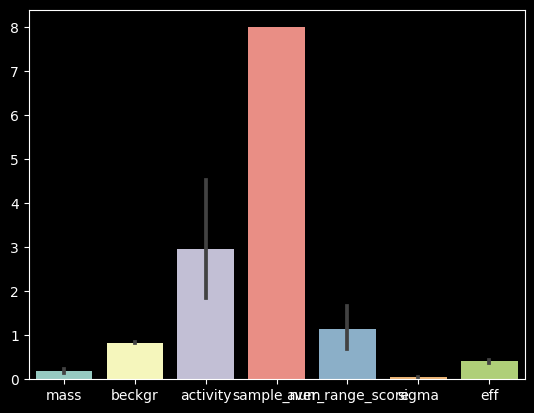

In [16]:

sns.barplot(data, )

## Записываем данные в csv файл 
___
['1329_Belgim_source_ATOMTEX.csv'](D:\study\python\1329\1329_Belgim_source_ATOMTEX.csv)

In [ ]:
# writing data in the file csv
data = data.sort_values(by= ['nucl', 'mass'])
data.to_csv('1329_Belgim_source_ATOMTEX.csv')

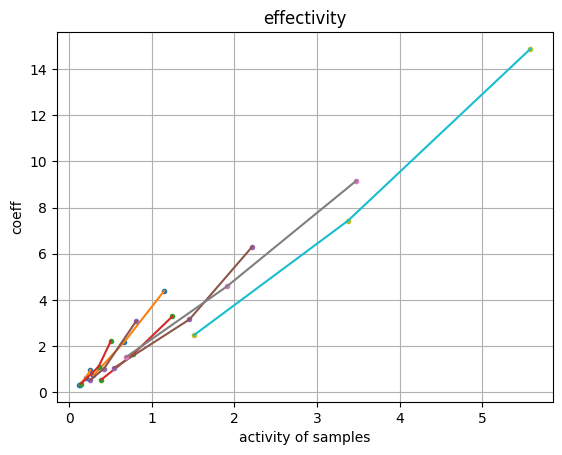

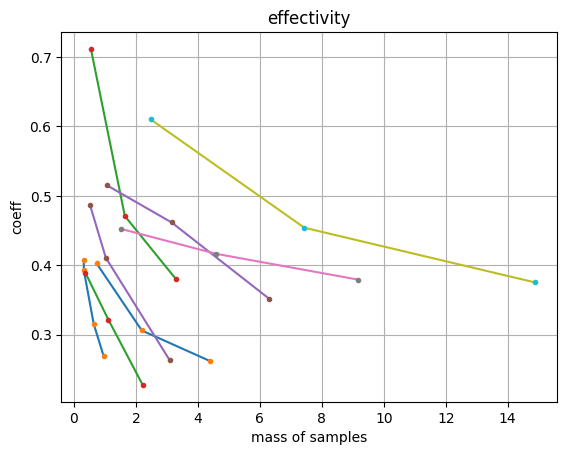

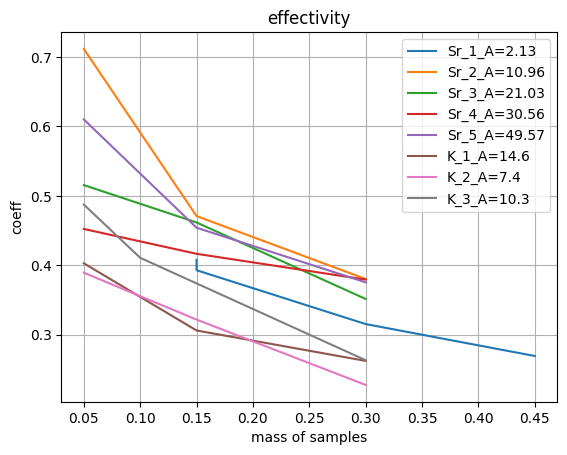

In [ ]:
# mapping
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.set(
    facecolor = 'white',
    title = 'effectivity',
    #ylim = [0, 200],
    xlabel = 'activity of samples',
    ylabel = 'coeff',
)
ax1.grid(True)

for i in Act.index:
      plt.plot(rez_data[rez_data['nucl'] == i]['aver'], rez_data[rez_data['nucl'] == i]['act'], '.',  label = i)
      plt.plot(rez_data[rez_data['nucl'] == i]['aver'], rez_data[rez_data['nucl'] == i]['act'], '-',  label = i)

fig = plt.figure()

ax2 = fig.add_subplot(111)
ax2.set(
    facecolor = 'white',
    title = 'effectivity',
    #ylim = [0, 200],
    xlabel = 'mass of samples',
    ylabel = 'coeff',
)
ax2.grid(True)

for i in Act.index:
      plt.plot(rez_data[rez_data['nucl'] == i]['act'], rez_data[rez_data['nucl'] == i]['eff'], '-', label = i)
      plt.plot(rez_data[rez_data['nucl'] == i]['act'], rez_data[rez_data['nucl'] == i]['eff'], '.', label = i)

fig = plt.figure()

ax3 = fig.add_subplot(111)
ax3.set(
    facecolor = 'white',
    title = 'effectivity',
    #ylim = [0, 200],
    xlabel = 'mass of samples',
    ylabel = 'coeff',
)
ax3.grid(True)

for i in Act.index:
      plt.plot(rez_data[rez_data['nucl'] == i]['mass'], rez_data[rez_data['nucl'] == i]['eff'], label = i)
ax3.legend()

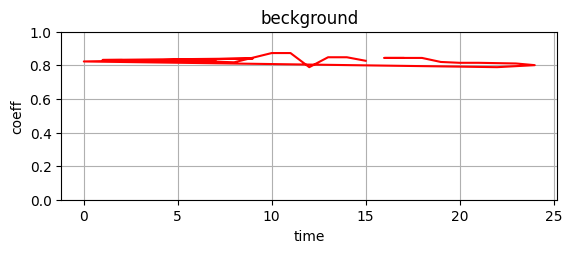

In [ ]:
# mapping
# figure container
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.set(
    facecolor = 'white',
    title = 'beckground',
    ylim = [0, 1],
    xlabel = 'time',
    ylabel = 'coeff',
)
ax1.grid(True)

plt.plot(rez_data.index, rez_data['beckgr'], '-r', label = 'all')


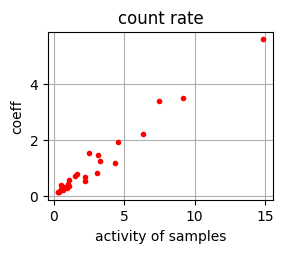

In [ ]:
# mapping
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set(
    facecolor = 'white',
    title = 'count rate',
    #ylim = [0, 200],
    xlabel = 'activity of samples',
    ylabel = 'coeff',
)
ax1.grid(True)

plt.plot(rez_data['act'], rez_data['aver'], '.r', label = 'all')